# HOG + SVM Classifier

In [84]:
from PIL import Image
import cv2
import glob
import random

## Processing images

https://www.thiscodeworks.com/importing-images-from-a-directory-python-to-list-or-dictionary-python/6200a02e4dd44f0015f3cd26 </p>
https://www.quora.com/How-can-I-read-multiple-images-in-Python-presented-in-a-folder </p>
https://stackoverflow.com/questions/26392336/importing-images-from-a-directory-python-to-list-or-dictionary

""" path = '/home/sueloc/Desktop/machine_learning/hog_svm-classifier/images'
data_path = os.path.join(path, '*.jpg')
dataframe = []
files = glob.glob(data_path)
for filename in files:
    im = cv.imread(filename)
    dataframe.append(im) """

In [85]:
image_list = []

for filename in glob.glob('/home/sueloc/Desktop/machine_learning/hog_svm-classifier/images/*.jpg'):
    im = Image.open(filename).convert('L')
    resized_img = im.resize((128, 64))
    image_list.append(resized_img)

13158


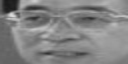

In [89]:
print(len(image_list))
image_list[0]

## Random partition

In [90]:
def partitionRankings(testPercent):
    howManyNumbers = int(round(testPercent*len(image_list)))
    shuffled = image_list[:]
    random.shuffle(shuffled)
    return np.array(shuffled[howManyNumbers:])

In [91]:
train = partitionRankings(0.2)
test = partitionRankings(0.8)

/tmp/ipykernel_3434/117683674.py:5: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(shuffled[howManyNumbers:])
/tmp/ipykernel_3434/117683674.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(shuffled[howManyNumbers:])


In [92]:
print(len(train))
print(type(train))
train

10526
<class 'numpy.ndarray'>


array([<PIL.Image.Image image mode=L size=128x64 at 0x7F4E1F6A1970>,
       <PIL.Image.Image image mode=L size=128x64 at 0x7F4E1FEB7DC0>,
       <PIL.Image.Image image mode=L size=128x64 at 0x7F4E1F5ACD30>, ...,
       <PIL.Image.Image image mode=L size=128x64 at 0x7F4E1FE708E0>,
       <PIL.Image.Image image mode=L size=128x64 at 0x7F4E1F579DF0>,
       <PIL.Image.Image image mode=L size=128x64 at 0x7F4E1F9EB0A0>],
      dtype=object)

In [93]:
print(len(test))
print(type(test))
test

2632
<class 'numpy.ndarray'>


array([<PIL.Image.Image image mode=L size=128x64 at 0x7F4E1F917FD0>,
       <PIL.Image.Image image mode=L size=128x64 at 0x7F4E1F470280>,
       <PIL.Image.Image image mode=L size=128x64 at 0x7F4E1F5326D0>, ...,
       <PIL.Image.Image image mode=L size=128x64 at 0x7F4E1FE15700>,
       <PIL.Image.Image image mode=L size=128x64 at 0x7F4E1FE3C130>,
       <PIL.Image.Image image mode=L size=128x64 at 0x7F4E1FEB7E20>],
      dtype=object)

## HOG feature vector

In [94]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [109]:
hog_features = []
hog_images = []

In [110]:
for image in test:
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
    hog_features.append(fd)
    hog_images.append(hog_image)

/tmp/ipykernel_3434/3324371994.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


In [111]:
print(type(hog_features))
print(len(hog_features))

<class 'list'>
2632


In [112]:
for image in train:
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
    hog_features.append(fd)
    hog_images.append(hog_image)

/tmp/ipykernel_3434/2684739557.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


In [113]:
print(type(hog_features))
print(len(hog_features))

<class 'list'>
13158
